In [29]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [30]:
################## IMPORT ALL GOOGLE TRENDS DATA ########################
prevent_flu = pd.read_csv('terms/prevent_flu.csv')
flu_2019 = pd.read_csv('terms/flu19.csv')
common_cold = pd.read_csv('terms/common_cold.csv')
oseltamivir = pd.read_csv('terms/oseltamivir.csv')
cough = pd.read_csv('terms/cough.csv')
gripe = pd.read_csv('terms/gripe.csv')
influenza = pd.read_csv('terms/influenza.csv')
vaccine = pd.read_csv('terms/vaccine.csv')
flu_symptoms = pd.read_csv('terms/flu_symptoms.csv')

################## IMPORT CDC DATA ##########################
# data_cdc = pd.read_csv('CDCDat/Clinical_Labs.csv')
data = pd.read_csv('allvariables2.csv')

################ RENAME COLUMNS IN DATA ##########################
flu_2019=flu_2019.rename(columns={'flu: (United States)':'pop searches'})
common_cold = common_cold.rename(columns={'Common cold: (United States)':'pop searches'})
oseltamivir = oseltamivir.rename(columns={'Oseltamivir: (United States)':'pop searches'})
prevent_flu = prevent_flu.rename(columns={'prevent flu: (United States)':'pop searches'})
cough = cough.rename(columns={'cough: (United States)':'pop searches'})
gripe = gripe.rename(columns={'gripe: (United States)':'pop searches'})
influenza = influenza.rename(columns={'influenza: (United States)':'pop searches'})
vaccine = vaccine.rename(columns={'vaccine: (United States)':'pop searches'})
flu_symptoms = flu_symptoms.rename(columns={'flu_symptoms: (United States)':'pop searches'})

In [31]:
data

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC
0,14,2004,1,6936,12.427900,853,9,76,65,55,21,25,80,28,5.0,0.0,3.0
1,15,2004,2,5411,9.332840,500,5,69,56,39,16,19,71,19,4.0,0.0,2.0
2,16,2004,3,4329,6.006010,257,3,63,55,31,14,31,30,15,3.0,0.0,3.0
3,17,2004,4,4166,3.984640,163,3,59,49,28,16,15,35,16,6.0,33.0,1.0
4,18,2004,5,3661,2.922700,105,2,50,49,20,16,15,26,16,5.0,0.0,1.0
5,19,2004,6,3530,1.841360,60,5,56,50,26,17,30,34,15,2.0,100.0,1.0
6,20,2004,7,3136,1.785710,48,8,45,49,21,14,35,17,13,2.0,66.0,1.0
7,21,2004,8,2559,1.484960,26,12,51,50,17,12,31,22,14,2.0,31.0,1.0
8,22,2004,9,2651,0.678989,10,8,43,48,10,9,12,56,11,1.0,0.0,1.0
9,23,2004,10,2369,0.590967,8,6,44,41,11,6,24,0,9,2.0,0.0,1.0


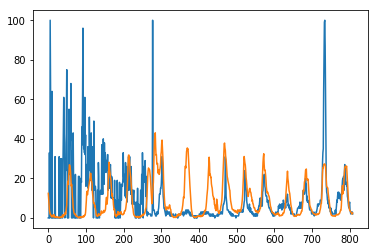

In [4]:
x=np.arange(0,809)
y=np.array(pd.Series(prevent_flu['pop searches']))
for i in range(len(y)):
    if y[i]=='<1':
        y[i]=0
    y[i]=int(y[i])
plt.plot(x,y)
y=data['PERCENT POSITIVE']
plt.plot(x,y)

In [6]:
for i in range(len(data)):
    if data['FLU'].iloc[i]=='<1':
        data['FLU'].iloc[i]=0
    else:
        data['FLU'].iloc[i]=int(data['FLU'].iloc[i])

Train RMSE:
7.619175721353725
Train
        true      pred      error
0  17.975700  2.805445  15.170255
1   0.449438  7.257505   6.808067
2   9.751240  9.346698   0.404542
3   5.018200  9.423398   4.405198
4   4.776120  8.060796   3.284676
5   1.475440  8.176520   6.701080
6   5.424820  8.526268   3.101448
7   1.736390  7.379180   5.642790
8   5.155890  7.832161   2.676271
9   1.062420  4.466092   3.403672 



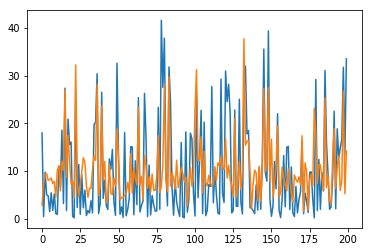

In [19]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','VACC','COUGH']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','VACC','COUGH']]

from sklearn.linear_model import ElasticNet

clf = ElasticNet(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
print(train_compare.head(10), "\n")

x=np.arange(0,200)
y=train_compare['true'].iloc[:200]
plt.plot(x,y)

y=train_compare['pred'].iloc[:200]
plt.plot(x,y)

numpy.ndarray